<a href="https://colab.research.google.com/github/mikeboyle321/Macromolecular_Engineering_Nanoparticle_Transport/blob/main/Langmuir_ode_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 14})
from scipy.integrate import odeint
from scipy.integrate import ode
# Refrence for numerical integration :https://physics.nyu.edu/pine/pymanual/html/chap9/chap9_scipy.html
# https://sam-dolan.staff.shef.ac.uk/mas212/notebooks/ODE_Example.html

In [2]:
# numerical integration - define the ode
def dtheta_dt(theta, t, c, ka, kd):
    return ka*c*(1-theta) - kd*theta

# define a function to numerically integrate fucntions
def langmuir_kinetic_integration(ka, kd, c, theta_0, t0, int_time, steps=10000):
  t_ads = np.linspace(t0, t0 + int_time, steps)
  theta = odeint(dtheta_dt, theta_0, t_ads, args=(c, ka, kd))
  return t_ads, theta

In [105]:
# Test parameters
k_a = [0.1, 1, 10, 100] # /s
k_d = 1 # /s
cs_ads = 50 # nM
ads_time = 1 # seconds
steps = 10000

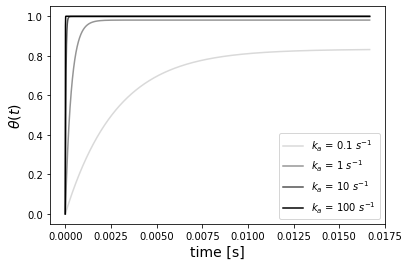

In [106]:
for i, value in enumerate(k_a):
  t, theta_ads = langmuir_kinetic_integration(ka=value, kd=k_d, c=cs_ads, theta_0=0.0, t0=0.0, int_time=ads_time, steps=steps)
  plt.plot(t/60, theta_ads, color =  plt.cm.Greys((1/len(k_a))*(i+1)), label = '$k_{a}$ = ' + str(value) + r' $s^{-1}$')
plt.xlabel('time [s]', fontsize=14)
plt.ylabel(r'$\theta(t)$', fontsize=14)
plt.legend()
plt.savefig('langmuir_time_integration.svg')